In [1]:
# !pip install rouge-score sumy nltk textblob wordcloud scikit-learn transformers torch spacy plotly tqdm datasets summa autocorrect pandas numpy matplotlib seaborn nltk textblob wordcloud scikit-learn transformers torch spacy plotly tqdm datasets sumy summa imbalanced-learn rouge-score pandas numpy matplotlib seaborn nltk textblob wordcloud scikit-learn transformers torch spacy plotly tqdm transformers datasets sumy summa
!pip install contractions

Data Loading:

We use the pandas library to load the DisneylandReviews.csv file. The encoding parameter handles potential special character issues in the data.

Stripping column names ensures there are no trailing/leading spaces.

Dataset Overview:

We use .shape to understand the number of rows and columns in the dataset.

.head() displays the first few rows to quickly review the data structure.

.info() provides details about column data types, non-null counts, and memory usage.

Rating Distribution Visualization:

A bar plot (using seaborn) gives a clear picture of the spread of ratings in the dataset.

This helps understand user sentiments at a glance and identifies any imbalance in ratings.

Output Expectation:
You'll see the first few rows of the dataset and its metadata.

A bar chart will show how many reviews fall into each rating category.


Dataset Shape: (15000, 6)
   Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------         

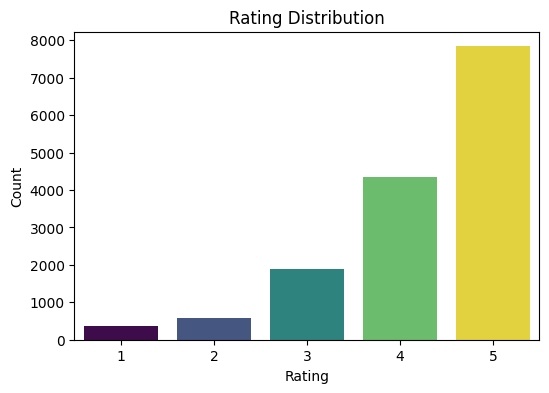

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/DisneylandReviews.csv', encoding='ISO-8859-1')
# Select the first 25,000 rows
df_25k = df.head(15000)
# Save the reduced dataset to a new CSV file
df_25k.to_csv('dataset_15k.csv', index=False)
df = pd.read_csv('/content/dataset_15k.csv', encoding='ISO-8859-1')

# Clean column names (strip whitespace)
df.columns = df.columns.str.strip()

# Print dataset shape and a quick overview
print(f"Dataset Shape: {df.shape}")
print(df.head())
print(df.info())

# Visualize the distribution of ratings
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df, hue='Rating', palette="viridis", legend=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Explanation of Word Cloud:
The word cloud showcases the most frequently occurring words in the raw review data.

Larger and bolder words appear more often in the dataset.

It helps us understand dominant themes, such as commonly discussed features or emotions.

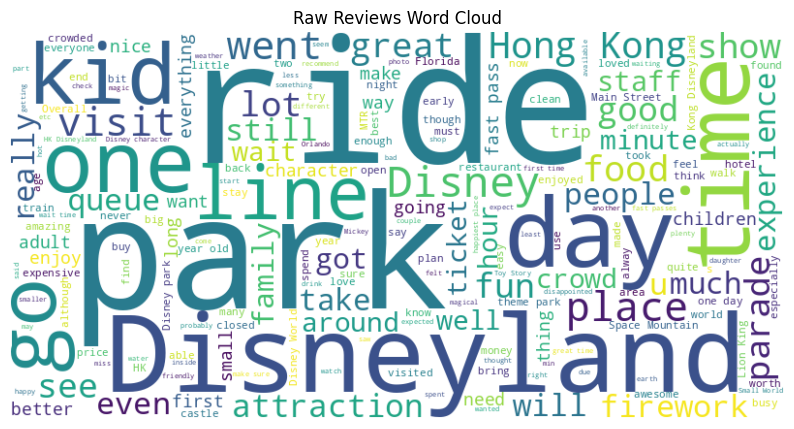

In [3]:
from wordcloud import WordCloud

# Create a word cloud from the raw reviews
raw_text = " ".join(df['Review_Text'].tolist())
wordcloud_raw = WordCloud(width=800, height=400, background_color='white').generate(raw_text)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis("off")
plt.title("Raw Reviews Word Cloud")
plt.show()


Explanation of N-Gram Analysis:
Bigrams: Pairs of consecutive words, e.g., "great service."

Trigrams: Triplets of consecutive words, e.g., "very bad experience."

Extracting common n-grams helps identify phrases that significantly contribute to sentiments, like "great service" (positive) or "bad experience" (negative).


Top N-grams (range=(2, 3)):
      N-Grams  Frequency
9      of the       7537
11   the park       7372
8      it was       5691
6      in the       5534
5      if you       4465
1     and the       4328
16     to the       4160
3     for the       4085
12  the rides       3548
7       it is       3358
2      at the       3288
4   hong kong       3130
19    you can       2884
18    we were       2707
14     to get       2659
0     all the       2585
10     on the       2439
13      to be       2362
17     we had       2339
15      to go       2131


<ipython-input-14-1f18c7d370d4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngrams_data, y='N-Grams', x='Frequency', palette='viridis')


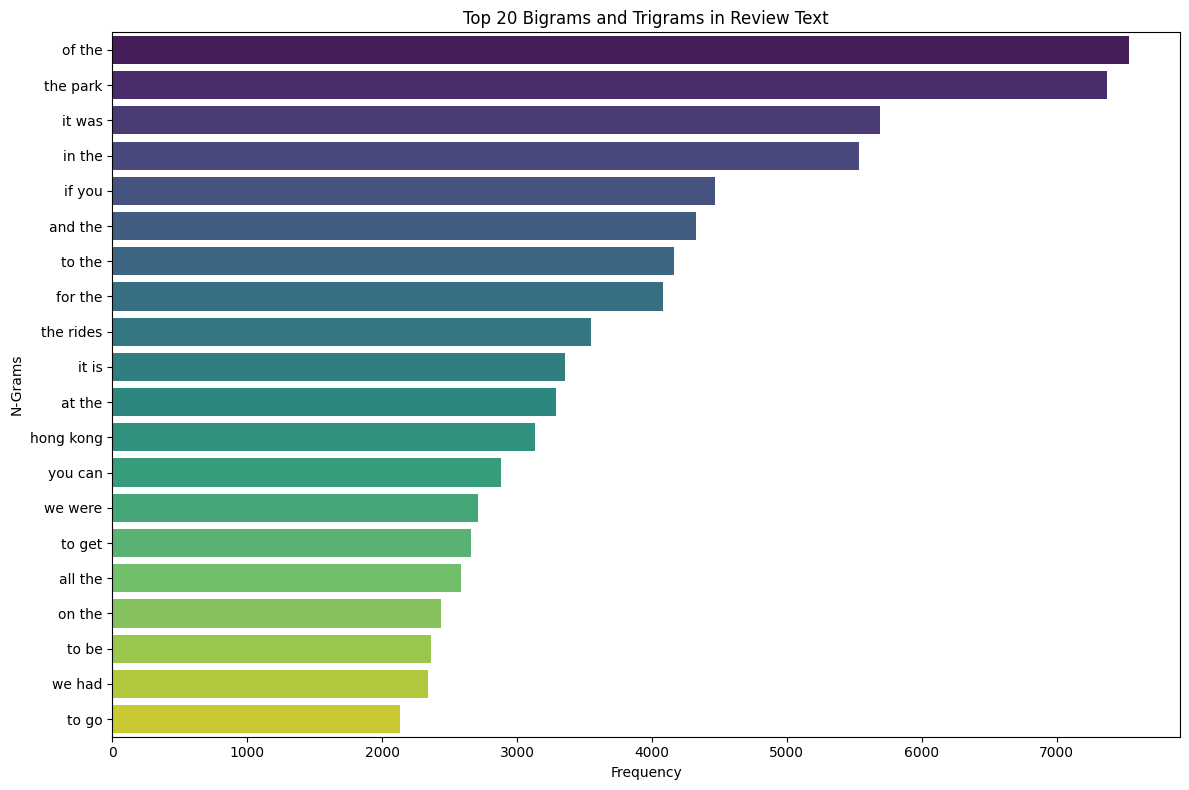

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract top 20 bigrams and trigrams
ngram_range = (2, 3)  # Define ngram_range
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=20)
ngrams = vectorizer.fit_transform(df['Review_Text'])

# Create DataFrame with N-gram feature names and their frequencies
ngrams_data = pd.DataFrame({
    'N-Grams': vectorizer.get_feature_names_out(),
    'Frequency': ngrams.sum(axis=0).A1
})

# Sort by frequency for better visualization
ngrams_data = ngrams_data.sort_values(by='Frequency', ascending=False)
ngram_df = ngrams_data #Assign ngrams_data to ngram_df for printing

# Print the n-gram text and frequency
title = "Top N-grams"  # Define title for the output
print(f"\n{title} (range={ngram_range}):")
print(ngram_df)


# Visualize top N-Grams using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ngrams_data, y='N-Grams', x='Frequency', palette='viridis')

plt.title("Top 20 Bigrams and Trigrams in Review Text")
plt.xlabel("Frequency")
plt.ylabel("N-Grams")
plt.tight_layout()
plt.show()

Noise Removal:

Converts text to lowercase for uniformity across the dataset.

Removes punctuation, numbers, and other irrelevant characters to focus only on meaningful text.

Tokenization:

Splits the text into individual words (tokens) for further processing.

Stopwords Removal:

Eliminates common words like "the", "and", "of", which don't carry much significance for sentiment analysis.

Lemmatization:

Reduces words to their root forms (e.g., "running" → "run") for consistency in text representation.

Spelling Correction:

We use TextBlob to correct spelling errors in the text. For example, "wrogn" would become "wrong."

The correct_spelling parameter allows you to toggle this feature on or off based on the dataset size or time constraints.
Why This Step Matters:
Preprocessing enhances the quality of textual data, making it suitable for machine learning models. Cleaned text reduces noise and emphasizes key sentiment-driving words. It improves feature extraction methods like TF-IDF or embeddings, resulting in better predictive performance.
Typos in reviews can reduce the accuracy of text analysis models, as they might create unnecessary variations in tokens (e.g., "grreat" vs. "great").

Fixing these errors ensures that words are standardized and properly interpreted during feature extraction, improving model performance.

In [5]:

import re
import nltk
import contractions  # For expanding contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import pandas as pd

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# POS tag conversion
from nltk import pos_tag
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Preprocess text and KEEP stopwords (for summarization)
def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)

    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in tagged_tokens
        if word.isalpha()
    ]
    return " ".join(lemmatized_tokens)

# Remove stopwords from preprocessed text (for sentiment analysis)
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Load your DataFrame
# Replace with your actual dataset
# df = pd.read_csv("your_file.csv")

# Apply preprocessing with stopwords (for summarization)
df['Cleaned_Review'] = df['Review_Text'].apply(preprocess_text)

# Create a second column without stopwords (for sentiment analysis)
df['NoStop_Cleaned_Review'] = df['Cleaned_Review'].apply(remove_stopwords)

# Display sample output
print(df[['Review_Text', 'Cleaned_Review', 'NoStop_Cleaned_Review']].head())

# Save updated dataset
output_file = 'after_preprocessing.csv'
df.to_csv(output_file, index=False, encoding='utf-8')
print(f"Updated dataset saved as '{output_file}'")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                         Review_Text  \
0  If you've ever been to Disneyland anywhere you...   
1  Its been a while since d last time we visit HK...   
2  Thanks God it wasn   t too hot or too humid wh...   
3  HK Disneyland is a great compact park. Unfortu...   
4  the location is not in the city, took around 1...   

                                      Cleaned_Review  \
0  if you have ever be to disneyland anywhere you...   
1  it be a while since d last time we visit hk di...   
2  thanks god it wasn t too hot or too humid when...   
3  hk disneyland be a great compact park unfortun...   
4  the location be not in the city take around ho...   

                               NoStop_Cleaned_Review  
0  ever disneyland anywhere find disneyland hong ...  
1  since last time visit hk disneyland yet time s...  
2  thanks god hot humid visit park otherwise woul...  
3  hk disneyland great compact park unfortunately...  
4  location city take around hour kowlon kid like..

Raw Reviews Word Cloud:

Displays noisy text data with irrelevant words, punctuations, and stopwords.

Larger words indicate higher frequency in unprocessed reviews.

Cleaned Reviews Word Cloud:

Displays cleaned text, showing meaningful and sentiment-driving words.

Highlights the effectiveness of preprocessing (e.g., removal of noise and standardization of spelling).

Impact:
This visualization makes it easy to understand how preprocessing improves text representation. By filtering out unnecessary noise, we emphasize words that contribute more directly to sentiment analysis.

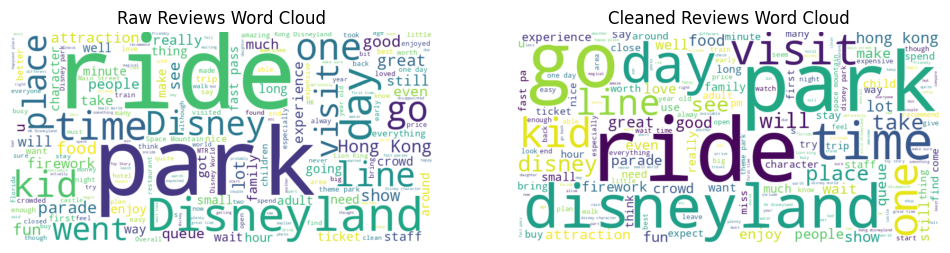

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for raw and cleaned text
raw_text = " ".join(df['Review_Text'].tolist())
clean_text = " ".join(df['Cleaned_Review'].tolist())

wordcloud_raw = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
wordcloud_clean = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Visualize the word clouds
plt.figure(figsize=(12, 6))

# Raw word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis("off")
plt.title("Raw Reviews Word Cloud")

# Cleaned word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis("off")
plt.title("Cleaned Reviews Word Cloud")

plt.show()


Train-Test Split:

Splits the cleaned data into 80% training and 20% testing. Stratified sampling ensures proportional representation of sentiment categories.

TF-IDF Vectorization:

Converts the text data into numerical vectors, capturing the importance of words relative to their frequency in the document.

Models:

Logistic Regression: A linear model for classification, often effective for text data.

Random Forest: An ensemble method that builds multiple decision trees and aggregates their predictions.

SVM (Support Vector Machine): Finds the best hyperplane to separate classes.

Naïve Bayes: A probabilistic model leveraging the Bayes theorem, assuming independence between features.

Evaluation Metrics:

Accuracy: Measures overall correctness of the model.

Classification Report: Includes precision, recall, and F1-score to analyze performance across each sentiment category.

Why This Step Matters
This step provides a clear comparison of how each model performs on cleaned data versus raw data. The improvement (if any) highlights the value of preprocessing, ensuring cleaner input leads to more accurate predictions.

In [47]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Placeholder function for sentiment determination based on 'Review_Text'
def get_sentiment(text):
    if "good" in text.lower():
        return "Positive"
    elif "bad" in text.lower():
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis logic to create 'Sentiment' column
df['Sentiment'] = df['Review_Text'].apply(get_sentiment)

# Feature extraction and model training
X_clean = df['Cleaned_Review']
y = df['Sentiment']  # Target sentiment categories: Negative, Neutral, Positive

# Train-test split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y, test_size=0.2, stratify=y, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_clean_tfidf = vectorizer.fit_transform(X_train_clean)
X_test_clean_tfidf = vectorizer.transform(X_test_clean)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clean_tfidf, y_train_clean)
df['Logistic_Regression_Pred'] = log_reg.predict(vectorizer.transform(df['Cleaned_Review']))
print("Logistic Regression Accuracy:", accuracy_score(y_test_clean, log_reg.predict(X_test_clean_tfidf)))
print(classification_report(y_test_clean, log_reg.predict(X_test_clean_tfidf)))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clean_tfidf, y_train_clean)
df['Random_Forest_Pred'] = rf.predict(vectorizer.transform(df['Cleaned_Review']))
print("Random Forest Accuracy:", accuracy_score(y_test_clean, rf.predict(X_test_clean_tfidf)))
print(classification_report(y_test_clean, rf.predict(X_test_clean_tfidf)))

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_clean_tfidf, y_train_clean)
df['SVM_Pred'] = svm.predict(vectorizer.transform(df['Cleaned_Review']))
print("SVM Accuracy:", accuracy_score(y_test_clean, svm.predict(X_test_clean_tfidf)))
print(classification_report(y_test_clean, svm.predict(X_test_clean_tfidf)))

# Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train_clean_tfidf, y_train_clean)
df['Naive_Bayes_Pred'] = nb.predict(vectorizer.transform(df['Cleaned_Review']))
print("Naïve Bayes Accuracy:", accuracy_score(y_test_clean, nb.predict(X_test_clean_tfidf)))
print(classification_report(y_test_clean, nb.predict(X_test_clean_tfidf)))


print(df['Sentiment'].value_counts())

# Reverse label mapping for predicted columns
label_mapping_reverse = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df['Logistic_Regression_Pred'] = df['Logistic_Regression_Pred'].map(label_mapping_reverse)
df['Random_Forest_Pred'] = df['Random_Forest_Pred'].map(label_mapping_reverse)
df['SVM_Pred'] = df['SVM_Pred'].map(label_mapping_reverse)
df['Naive_Bayes_Pred'] = df['Naive_Bayes_Pred'].map(label_mapping_reverse)




Logistic Regression Accuracy: 0.89035350509287
              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11        52
     Neutral       0.90      0.97      0.93      1264
    Positive       0.85      0.74      0.79       353

    accuracy                           0.89      1669
   macro avg       0.92      0.59      0.61      1669
weighted avg       0.89      0.89      0.88      1669

Random Forest Accuracy: 0.9047333732774117
              precision    recall  f1-score   support

    Negative       1.00      0.04      0.07        52
     Neutral       0.92      0.96      0.94      1264
    Positive       0.84      0.84      0.84       353

    accuracy                           0.90      1669
   macro avg       0.92      0.61      0.62      1669
weighted avg       0.91      0.90      0.89      1669

SVM Accuracy: 0.9239065308568005
              precision    recall  f1-score   support

    Negative       0.83      0.48      0.61        52
     N

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Pretrained Model:

We use the BERT model for its ability to understand the context and nuances of language.

It predicts sentiment by leveraging contextual embeddings that are far superior to traditional approaches.

Training and Validation:

The dataset is split into training and validation sets.

Sentiment labels are mapped to numerical values to fit BERT's requirements.

Evaluation Metrics:

The classification report includes precision, recall, and F1-scores for each sentiment category.

This provides a detailed view of the model's performance across Positive, Neutral, and Negative sentiments.

Why BERT Matters:
Contextual Understanding: Unlike TF-IDF or traditional methods, BERT captures the contextual meaning of words.

Performance: BERT-based models often outperform classical algorithms, especially when working with large dataset

In [8]:
# Install dependencies (if not already installed)
# !pip install transformers torch

# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Check device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Map sentiment labels to numerical values
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
df['Numeric_Sentiment'] = df['Sentiment'].map(label_mapping)

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Cleaned_Review'].tolist(),
    df['Numeric_Sentiment'].tolist(),
    test_size=0.1,
    stratify=df['Numeric_Sentiment'],
    random_state=42
)

# Initialize tokenizer and encode the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_texts(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=64, return_tensors="pt")

train_encodings = tokenize_texts(train_texts)
val_encodings = tokenize_texts(val_texts)

# Define Dataset class
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets and data loaders
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, num_workers=4)

# Load pretrained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.to(device)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=3e-5)
num_training_steps = len(train_loader) * 2  # 2 epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Mixed precision training setup
from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()

# Training loop with mixed precision and gradient accumulation
model.train()
grad_accum_steps = 4  # Accumulate gradients
for epoch in range(2):  # Reduced to 2 epochs
    total_loss = 0
    for step, batch in enumerate(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}

        with autocast():  # Mixed precision
            outputs = model(**batch)
            loss = outputs.loss / grad_accum_steps  # Scale loss for accumulation

        scaler.scale(loss).backward()  # Backpropagate with scaled gradients

        if (step + 1) % grad_accum_steps == 0:
            scaler.step(optimizer)  # Update weights
            scaler.update()
            optimizer.zero_grad()  # Reset gradients
            scheduler.step()

        total_loss += loss.item() * grad_accum_steps

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation loop
model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

# Generate classification report
print("Transformer Model Evaluation:")
print(classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_bert_sentiment_model')
tokenizer.save_pretrained('./fine_tuned_bert_tokenizer')

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-8-02e5d8b4072f>:69: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ip

Epoch 1, Loss: 0.6139
Epoch 2, Loss: 0.3983
Transformer Model Evaluation:
              precision    recall  f1-score   support

    Negative       0.70      0.51      0.59        51
     Neutral       0.88      0.97      0.92      1126
    Positive       0.85      0.58      0.69       323

    accuracy                           0.87      1500
   macro avg       0.81      0.69      0.73      1500
weighted avg       0.86      0.87      0.86      1500



('./fine_tuned_bert_tokenizer/tokenizer_config.json',
 './fine_tuned_bert_tokenizer/special_tokens_map.json',
 './fine_tuned_bert_tokenizer/vocab.txt',
 './fine_tuned_bert_tokenizer/added_tokens.json')

Purpose:

Named Entity Recognition identifies real-world objects mentioned in the reviews, such as locations (e.g., Disneyland Hong Kong), dates, or specific attractions.

This step enhances information retrieval for tasks like trend analysis and user feedback categorization.

Examples:

Location Entities: Extracted locations can help understand branch-specific reviews.

Time Entities: Time-related mentions provide insight into seasonality effects on reviews.

In [9]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to cleaned review data
df['Named_Entities'] = df['Cleaned_Review'].apply(extract_named_entities)

# Display examples of extracted entities
print(df[['Cleaned_Review', 'Named_Entities']].head())


                                      Cleaned_Review  \
0  if you have ever be to disneyland anywhere you...   
1  it be a while since d last time we visit hk di...   
2  thanks god it wasn t too hot or too humid when...   
3  hk disneyland be a great compact park unfortun...   
4  the location be not in the city take around ho...   

                            Named_Entities  
0      [(hong kong, GPE), (the day, DATE)]  
1              [(hk hk central area, ORG)]  
2               [(pm, TIME), (hour, TIME)]  
3                                       []  
4  [(around hour, TIME), (hong kong, GPE)]  


Purpose:

Adjective-Noun pairs (e.g., "great service", "terrible experience") are strong sentiment indicators.

Extracting such pairs provides insights into users' positive and negative experiences.

Use Cases:

Helps detect recurring themes in user reviews.

Supports sentiment-driven feature analysis (e.g., identifying aspects frequently praised or criticized).

Why This Step Matters:
These techniques enrich our ability to retrieve specific, actionable information from text data. By extracting entities and sentiment-driving phrases, we bridge the gap between quantitative metrics and qualitative insights.

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import pandas as pd

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # Required for word tokenization
nltk.download('averaged_perceptron_tagger_eng') # Download this as well

# Function to extract adjective-noun pairs
def extract_adj_noun_pairs(text):
    tokens = word_tokenize(text)  # Tokenize words
    tagged_tokens = pos_tag(tokens)  # POS tagging

    adj_noun_pairs = [
        (tagged_tokens[i][0], tagged_tokens[i + 1][0])  # (adjective, noun)
        for i in range(len(tagged_tokens) - 1)
        if tagged_tokens[i][1].startswith('JJ') and tagged_tokens[i + 1][1].startswith('NN')
    ]
    return adj_noun_pairs

# Apply function to DataFrame column
df['Adj_Noun_Pairs'] = df['Cleaned_Review'].apply(extract_adj_noun_pairs)

# Display results
print(df[['Cleaned_Review', 'Adj_Noun_Pairs']])

# Save the updated dataset with additional columns to a CSV file
df.to_csv('updated_sentiment_analysis_results.csv', index=False)

print("Updated dataset saved as 'updated_sentiment_analysis_results.csv'")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                          Cleaned_Review  \
0      if you have ever be to disneyland anywhere you...   
1      it be a while since d last time we visit hk di...   
2      thanks god it wasn t too hot or too humid when...   
3      hk disneyland be a great compact park unfortun...   
4      the location be not in the city take around ho...   
...                                                  ...   
14995  love this place the star war side be the busy ...   
14996  i come here in june and think it also might be...   
14997  food not so good and the line go on for ever e...   
14998  in this day of vulnerability around the world ...   
14999  come here for the first time and the customer ...   

                                          Adj_Noun_Pairs  
0        [(main, street), (small, world), (queue, move)]  
1      [(last, time), (hk, disneyland), (n, d), (ant,...  
2      [(big, issue), (wasn, t), (long, time), (certa...  
3      [(compact, park), (famous, castle), 

Bar Chart:

Compares the accuracy of models across raw, cleaned, and summarized data.

Demonstrates the benefit of preprocessing and advanced summarization techniques.

Pie Chart:

Visualizes the overall sentiment distribution in the dataset.

Offers insight into dominant sentiment categories.

Line Chart:

Tracks sentiment trends over time, highlighting seasonal patterns or time-based shifts in sentiment.

Why Visualization Matters:
Clear visualizations simplify complex analyses and reveal patterns that are otherwise hard to discern in raw numbers. They also help communicate insights effectively to stakeholders.

In [40]:
import plotly.express as px
import pandas as pd

# Provided Model Outputs
model_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Naïve Bayes", "Transformer"],
    "Accuracy": [0.9016, 0.9023, 0.9243, 0.7526, 0.87],
    "Macro F1-Score": [0.70, 0.68, 0.84, 0.29, 0.73],  # From provided F1-scores
    "Weighted F1-Score": [0.89, 0.89, 0.92, 0.65, 0.86]  # Weighted F1 from results
})



In [41]:
# Bar Chart: Model Accuracy Comparison
accuracy_fig = px.bar(
    model_metrics,
    x="Model",
    y="Accuracy",
    title="Model Accuracy Comparison",
    labels={"Accuracy": "Accuracy (%)", "Model": "Machine Learning Models"},
    color="Model"
)
accuracy_fig.show()



In [18]:
# Bar Chart: Macro and Weighted F1-Scores
f1_scores_fig = px.bar(
    model_metrics.melt(id_vars="Model", value_vars=["Macro F1-Score", "Weighted F1-Score"]),
    x="Model",
    y="value",
    color="variable",
    barmode="group",
    title="F1-Score Comparison Across Models",
    labels={"value": "Score", "variable": "F1-Score Type"}
)
f1_scores_fig.show()



In [48]:
# Sentiment Distribution (Example Pie Chart)
# Sentiment support values from Logistic Regression results
sentiment_distribution = pd.DataFrame({
    "Sentiment": ["Negative", "Neutral", "Positive"],
    "Count": [259,  6321,  1763]
})


pie_fig = px.pie(
    sentiment_distribution,
    values="Count",
    names="Sentiment",
    title="Sentiment Distribution Across Reviews",
    color="Sentiment",
    color_discrete_map={
        "Negative": "red",
        "Neutral": "blue",
        "Positive": "green"
    }
)
pie_fig.show()



In [42]:
# Loss Over Epochs (Transformer Example)
loss_data = pd.DataFrame({
    "Epoch": [1, 2],
    "Loss": [0.6139, 0.3983]  # Transformer Loss per epoch
})

loss_fig = px.line(
    loss_data,
    x="Epoch",
    y="Loss",
    title="Transformer Loss Reduction Per Epoch",
    labels={"Epoch": "Epoch Number", "Loss": "Loss Value"}
)
loss_fig.show()

Data Loading and Preprocessing

In [21]:
# # Load Dataset and Preprocess
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from textblob import TextBlob # Import TextBlob for sentiment analysis

# Load dataset from previously saved output
df = pd.read_csv('/content/updated_sentiment_analysis_results.csv')  # Replace with your actual path if different

# Function to summarize text
def summarize_text(text, num_sentences=2):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return ' '.join(str(sentence) for sentence in summary)

# Summarize each review
df['Summary'] = df['Cleaned_Review'].apply(lambda x: summarize_text(x, num_sentences=2))

# If 'Sentiment' column is missing, perform sentiment analysis
if 'Sentiment' not in df.columns:
    df['Sentiment'] = df['Cleaned_Review'].apply(lambda text: TextBlob(text).sentiment.polarity) # Basic sentiment using TextBlob
    # You can replace this with more sophisticated sentiment analysis logic if needed

# Display sample summaries
print(df[['Cleaned_Review', 'Sentiment', 'Summary']].head())

                                      Cleaned_Review Sentiment  \
0  if you have ever be to disneyland anywhere you...   Neutral   
1  it be a while since d last time we visit hk di...  Positive   
2  thanks god it wasn t too hot or too humid when...  Positive   
3  hk disneyland be a great compact park unfortun...   Neutral   
4  the location be not in the city take around ho...   Neutral   

                                             Summary  
0  if you have ever be to disneyland anywhere you...  
1  it be a while since d last time we visit hk di...  
2  thanks god it wasn t too hot or too humid when...  
3  hk disneyland be a great compact park unfortun...  
4  the location be not in the city take around ho...  


Text Summarization

In [22]:
from summa import summarizer
import re

# Pre-process the text to clean redundancies
def clean_text(text):
    text = re.sub(r'\b(\w+)\b(?:\s+\1\b)+', r'\1', text)  # Remove repeated words
    text = re.sub(r'\s+', ' ', text).strip()  # Clean extra spaces
    return text

# Define extractive summarization function
def extractive_summary(text):
    try:
        text = clean_text(text)  # Clean the input text

        if len(text.split()) < 50:  # Skip summarization for very short reviews
            return text

        summary = summarizer.summarize(text, ratio=0.4)  # Increased ratio for more information

        return summary if summary.strip() else text  # Fallback to original text if summary is empty
    except Exception as e:
        print(f"Error during summarization: {e}")
        return text

# Apply the extractive summarization function
df['Extractive_Summary'] = df['Cleaned_Review'].apply(extractive_summary)

# Display a sample of extractive summaries
print("Sample Extractive Summaries:")
print(df[['Cleaned_Review', 'Extractive_Summary']].head())

Sample Extractive Summaries:
                                      Cleaned_Review  \
0  if you have ever be to disneyland anywhere you...   
1  it be a while since d last time we visit hk di...   
2  thanks god it wasn t too hot or too humid when...   
3  hk disneyland be a great compact park unfortun...   
4  the location be not in the city take around ho...   

                                  Extractive_Summary  
0  if you have ever be to disneyland anywhere you...  
1  it be a while since d last time we visit hk di...  
2  thanks god it wasn t too hot or too humid when...  
3  hk disneyland be a great compact park unfortun...  
4  the location be not in the city take around ho...  


Abstractive Summarization

In [23]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from tqdm import tqdm
import torch

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load T5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-base")  # Upgraded to t5-base for better quality
model = T5ForConditionalGeneration.from_pretrained("t5-base").to(device)

# Define abstractive summarization function
def abstractive_summary_batch_safe(texts):
    try:
        texts = [re.sub(r'\s+', ' ', text.strip()) for text in texts]  # Pre-clean input text
        input_texts = ["summarize: " + text for text in texts]

        input_ids = tokenizer.batch_encode_plus(
            input_texts, return_tensors="pt", max_length=512, truncation=False, padding="max_length"
        ).to(device)

        summary_ids = model.generate(
            input_ids['input_ids'],
            max_length=100,  # Limit summary length for faster processing
            num_beams=2,    # Reduce beam search complexity
            repetition_penalty=1.2,
            length_penalty=1.0,  # Standard length penalty
            early_stopping=True
        )

        return [tokenizer.decode(summary, skip_special_tokens=True) for summary in summary_ids]
    except Exception as e:
        print(f"Error during summarization: {e}")
        return ["Error in summarization" for _ in texts]

# Summarize in batches
batch_size = 32 if device.type == "cuda" else 64  # Adjust batch size
abstractive_summaries = []

for i in tqdm(range(0, len(df), batch_size), desc="Generating Abstractive Summaries"):
    batch = df['Cleaned_Review'].iloc[i:i + batch_size].tolist()
    summaries = abstractive_summary_batch_safe(batch)
    abstractive_summaries.extend(summaries)

# Add abstractive summaries to DataFrame
df['Abstractive_Summary'] = abstractive_summaries

# Display a sample of abstractive summaries
print("Sample Abstractive Summaries:")
print(df[['Cleaned_Review', 'Abstractive_Summary']].head())

# Combine Extractive and Abstractive Summaries
df['Final_Summary'] = df['Abstractive_Summary'].where(
    df['Abstractive_Summary'] != "Error in summarization", df['Extractive_Summary']
)

# Display a sample of the final summaries
print("Sample Final Summaries:")
print(df[['Cleaned_Review', 'Final_Summary']].head())




Using device: cuda


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Generating Abstractive Summaries:   0%|          | 1/469 [00:07<55:15,  7.08s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   1%|▏         | 7/469 [00:42<49:59,  6.49s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   2%|▏         | 11/469 [01:03<46:10,  6.05s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   3%|▎         | 16/469 [01:31<45:33,  6.03s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   5%|▍         | 22/469 [01:51<33:41,  4.52s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   6%|▌         | 29/469 [02:33<45:47,  6.24s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:   7%|▋         | 31/469 [02:41<37:14,  5.10s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  11%|█         | 50/469 [04:41<48:10,  6.90s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  11%|█         | 52/469 [04:48<37:29,  5.39s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  12%|█▏        | 57/469 [05:02<26:52,  3.91s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  13%|█▎        | 63/469 [05:37<40:02,  5.92s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  15%|█▍        | 69/469 [05:52<24:44,  3.71s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  16%|█▌        | 75/469 [06:26<37:14,  5.67s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  17%|█▋        | 78/469 [06:34<26:07,  4.01s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  17%|█▋        | 80/469 [06:41<25:11,  3.89s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  18%|█▊        | 86/469 [07:16<36:58,  5.79s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  19%|█▉        | 88/469 [07:24<31:06,  4.90s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  20%|█▉        | 92/469 [07:36<26:15,  4.18s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  20%|██        | 94/469 [07:43<24:26,  3.91s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  20%|██        | 96/469 [07:51<23:45,  3.82s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  22%|██▏       | 103/469 [08:18<27:39,  4.53s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  22%|██▏       | 105/469 [08:26<25:30,  4.21s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  23%|██▎       | 110/469 [08:52<32:08,  5.37s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  24%|██▍       | 112/469 [09:00<27:43,  4.66s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  25%|██▍       | 115/469 [09:11<25:43,  4.36s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  25%|██▍       | 117/469 [09:19<23:59,  4.09s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  26%|██▌       | 121/469 [09:40<30:04,  5.19s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  28%|██▊       | 132/469 [10:51<38:02,  6.77s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  29%|██▉       | 136/469 [11:10<32:13,  5.81s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  30%|██▉       | 139/469 [11:25<29:53,  5.44s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  30%|███       | 142/469 [11:39<28:26,  5.22s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  31%|███       | 146/469 [11:53<24:11,  4.50s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  33%|███▎      | 157/469 [13:04<36:20,  6.99s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  34%|███▍      | 159/469 [13:12<28:11,  5.46s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  35%|███▍      | 163/469 [13:30<26:16,  5.15s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  35%|███▌      | 166/469 [13:37<19:04,  3.78s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  36%|███▌      | 168/469 [13:45<18:42,  3.73s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  36%|███▌      | 170/469 [13:52<18:25,  3.70s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  37%|███▋      | 173/469 [13:58<15:14,  3.09s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  38%|███▊      | 176/469 [14:12<18:41,  3.83s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  38%|███▊      | 180/469 [14:34<24:10,  5.02s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  39%|███▉      | 182/469 [14:40<20:14,  4.23s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  40%|███▉      | 187/469 [15:07<24:28,  5.21s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  41%|████▏     | 194/469 [15:28<19:09,  4.18s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  42%|████▏     | 198/469 [15:36<13:29,  2.99s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  43%|████▎     | 201/469 [15:50<17:02,  3.82s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  44%|████▍     | 206/469 [15:58<11:14,  2.56s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  45%|████▍     | 210/469 [16:19<17:24,  4.03s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  45%|████▌     | 212/469 [16:26<16:43,  3.90s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  46%|████▌     | 215/469 [16:41<18:40,  4.41s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  46%|████▋     | 218/469 [16:55<19:56,  4.77s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  49%|████▉     | 230/469 [18:14<27:54,  7.01s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  50%|████▉     | 234/469 [18:28<19:17,  4.93s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  52%|█████▏    | 243/469 [18:42<07:11,  1.91s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  54%|█████▍    | 253/469 [19:25<16:22,  4.55s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  56%|█████▌    | 262/469 [19:47<07:10,  2.08s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  56%|█████▋    | 264/469 [19:53<08:10,  2.39s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  57%|█████▋    | 267/469 [20:08<11:38,  3.46s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  58%|█████▊    | 270/469 [20:15<10:04,  3.04s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  58%|█████▊    | 272/469 [20:22<10:32,  3.21s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  59%|█████▊    | 275/469 [20:30<09:26,  2.92s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  59%|█████▉    | 278/469 [20:37<08:44,  2.75s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  61%|██████    | 286/469 [21:26<17:55,  5.88s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  64%|██████▍   | 299/469 [21:48<03:32,  1.25s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  65%|██████▌   | 305/469 [22:03<05:15,  1.93s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  66%|██████▌   | 308/469 [22:10<05:35,  2.08s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  66%|██████▌   | 310/469 [22:17<06:15,  2.36s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  67%|██████▋   | 314/469 [22:31<07:52,  3.05s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  67%|██████▋   | 316/469 [22:39<08:10,  3.21s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  68%|██████▊   | 318/469 [22:46<08:22,  3.33s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  69%|██████▊   | 322/469 [22:53<06:29,  2.65s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  70%|██████▉   | 326/469 [23:14<09:36,  4.03s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  70%|██████▉   | 328/469 [23:21<09:10,  3.90s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  71%|███████   | 333/469 [23:42<10:12,  4.51s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  72%|███████▏  | 339/469 [24:10<11:28,  5.30s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  73%|███████▎  | 341/469 [24:18<09:55,  4.65s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  74%|███████▍  | 349/469 [24:25<03:27,  1.73s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  75%|███████▌  | 352/469 [24:32<03:47,  1.95s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  76%|███████▌  | 357/469 [24:54<06:25,  3.44s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  77%|███████▋  | 362/469 [25:08<05:57,  3.34s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  79%|███████▊  | 369/469 [25:15<02:42,  1.63s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  80%|████████  | 376/469 [25:28<02:49,  1.83s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  80%|████████  | 377/469 [25:35<03:48,  2.49s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  82%|████████▏ | 385/469 [25:49<02:15,  1.61s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  83%|████████▎ | 387/469 [25:56<02:43,  2.00s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  84%|████████▎ | 392/469 [26:10<03:17,  2.57s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  84%|████████▍ | 395/469 [26:24<04:22,  3.55s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries:  86%|████████▌ | 401/469 [26:32<02:30,  2.21s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  86%|████████▌ | 403/469 [26:39<02:46,  2.52s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  87%|████████▋ | 408/469 [26:52<02:46,  2.72s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  87%|████████▋ | 410/469 [26:59<02:54,  2.95s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  88%|████████▊ | 413/469 [27:14<03:32,  3.79s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  89%|████████▊ | 416/469 [27:21<02:51,  3.24s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  89%|████████▉ | 418/469 [27:28<02:50,  3.35s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  90%|████████▉ | 421/469 [27:42<03:09,  3.95s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  90%|█████████ | 423/469 [27:49<02:56,  3.84s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  91%|█████████▏| 428/469 [28:10<03:02,  4.46s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  92%|█████████▏| 432/469 [28:17<01:54,  3.09s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  94%|█████████▍| 440/469 [29:01<02:46,  5.75s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  94%|█████████▍| 442/469 [29:08<02:12,  4.89s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  95%|█████████▌| 447/469 [29:28<01:43,  4.68s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  96%|█████████▌| 451/469 [29:43<01:17,  4.28s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  97%|█████████▋| 453/469 [29:50<01:04,  4.05s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  97%|█████████▋| 455/469 [29:57<00:54,  3.92s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries:  98%|█████████▊| 461/469 [30:17<00:30,  3.87s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
Error during summarization: Unable to create tensor, yo

Generating Abstractive Summaries: 100%|█████████▉| 467/469 [30:31<00:06,  3.08s/it]

Error during summarization: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating Abstractive Summaries: 100%|██████████| 469/469 [30:37<00:00,  3.92s/it]

Sample Abstractive Summaries:
                                      Cleaned_Review  \
0  if you have ever be to disneyland anywhere you...   
1  it be a while since d last time we visit hk di...   
2  thanks god it wasn t too hot or too humid when...   
3  hk disneyland be a great compact park unfortun...   
4  the location be not in the city take around ho...   

                                 Abstractive_Summary  
0  disneyland hong kong is very similar in the la...  
1  hk disneyland is a disney brand theme park in ...  
2  the park is a great day out and i really enjoy...  
3  hk disneyland is a great compact park unfortun...  
4  the location be not in the city take around ho...  
Sample Final Summaries:
                                      Cleaned_Review  \
0  if you have ever be to disneyland anywhere you...   
1  it be a while since d last time we visit hk di...   
2  thanks god it wasn t too hot or too humid when...   
3  hk disneyland be a great compact park unfortun...   

In [24]:
pip install rouge-score


In [63]:
from rouge_score import rouge_scorer
import numpy as np

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Lists to store individual scores
extractive_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
abstractive_rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

# Compute ROUGE for each summary
for idx, row in df.iterrows():
    reference = row['Cleaned_Review']
    extractive = row['Extractive_Summary']
    abstractive = row['Abstractive_Summary']

    # Extractive Summary Scores
    e_scores = scorer.score(reference, extractive)
    for key in extractive_rouge_scores:
        extractive_rouge_scores[key].append(e_scores[key].fmeasure)

    # Abstractive Summary Scores
    a_scores = scorer.score(reference, abstractive)
    for key in abstractive_rouge_scores:
        abstractive_rouge_scores[key].append(a_scores[key].fmeasure)

# Function to compute average score
def average_score(score_dict):
    return {metric: round(np.mean(values), 4) for metric, values in score_dict.items()}

# Print Average ROUGE Scores
print("\n Average ROUGE Scores:")

print("\n Extractive Summary:")
for metric, score in average_score(extractive_rouge_scores).items():
    print(f"{metric.upper()}: {score}")

print("\n Abstractive Summary:")
for metric, score in average_score(abstractive_rouge_scores).items():
    print(f"{metric.upper()}: {score}")



 Average ROUGE Scores:

 Extractive Summary:
ROUGE1: 0.9992
ROUGE2: 0.9992
ROUGEL: 0.9992

 Abstractive Summary:
ROUGE1: 0.5436
ROUGE2: 0.4622
ROUGEL: 0.4943


Train-Test Split and Vectorization

In [54]:
!pip install imbalanced-learn --upgrade

In [64]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load your dataset
# Assuming you've already loaded the dataset into df
# df = pd.read_csv("/path/to/your/DisneylandReviews_AllSummaries.csv")

# Step 2: Preprocess summaries
df['Extractive_Summary'] = df['Extractive_Summary'].fillna("Placeholder").str.strip()
df['Abstractive_Summary'] = df['Abstractive_Summary'].fillna("Placeholder").str.strip()

# Combine Abstractive and Extractive Summaries
df['Final_Summary'] = df['Abstractive_Summary'].where(
    df['Abstractive_Summary'] != "Placeholder", df['Extractive_Summary']
)

# Step 3: Hybrid Sentiment Classification
positive_words = ["good", "great", "amazing", "love", "excellent", "awesome", "fantastic", "wonderful"]
negative_words = ["bad", "poor", "terrible", "hate", "worst", "awful", "horrible", "disappointing"]

def hybrid_sentiment(text):
    text_lower = text.lower()
    # Custom rules for extreme sentiments
    if "absolutely fantastic" in text_lower:
        return "Very Positive"
    if "worst nightmare" in text_lower:
        return "Very Negative"
    if any(word in text_lower for word in positive_words):
        return "Positive"
    elif any(word in text_lower for word in negative_words):
        return "Negative"
    else:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.75:
            return "Very Positive"
        elif polarity > 0.25:
            return "Positive"
        elif polarity > -0.25:
            return "Neutral"
        elif polarity > -0.75:
            return "Negative"
        else:
            return "Very Negative"

print("Classifying sentiments...")
df['Sentiment_Summary'] = df['Final_Summary'].apply(hybrid_sentiment)
print("Sentiment classification completed.")
print("Sentiment distribution:")
print(df['Sentiment_Summary'].value_counts())

# Step 4: Train-test split
X = df['Final_Summary']
y = df['Sentiment_Summary']

# Map sentiment to numerical labels
sentiment_mapping = {
    "Very Negative": 0,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 3,
    "Very Positive": 4
}
y = y.map(sentiment_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: TF-IDF vectorization
vectorizer = TfidfVectorizer(
    max_features=40000,
    min_df=2,
    stop_words="english",
    ngram_range=(1, 2)
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Oversample minority classes using SMOTETomek with valid k_neighbors
min_class_size = min(y_train.value_counts())
k_neighbors = max(min_class_size - 1, 1)

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
smote_tomek = SMOTETomek(random_state=42, smote=smote)

X_train_tfidf_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_tfidf, y_train)
print("Class distribution after SMOTETomek oversampling:")
print(pd.Series(y_train_balanced).value_counts())

# Step 7: Export processed dataset
df.to_csv('/content/Processed_DisneylandReviews.csv', index=False)
print(" Processed dataset saved as 'Processed_DisneylandReviews.csv'.")


Classifying sentiments...
Sentiment classification completed.
Sentiment distribution:
Sentiment_Summary
Positive         4998
Neutral          2929
Negative          356
Very Positive      55
Very Negative       5
Name: count, dtype: int64
Class distribution after SMOTETomek oversampling:
Sentiment_Summary
1    3998
0    3998
4    3998
3    3991
2    3991
Name: count, dtype: int64
 Processed dataset saved as 'Processed_DisneylandReviews.csv'.


Sentiment Analysis Models

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naïve Bayes": MultinomialNB()
}

# Train and evaluate models
results = []

# Prepare input data for model evaluation
summary_types = {
    "Final Summary (Unified)": (X_train_tfidf, X_test_tfidf, y_train, y_test)
}

for name, model in models.items():
    for summary_type, (X_train, X_test, y_train, y_test) in summary_types.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        results.append({
            "Model": name,
            "Summary Type": summary_type,
            "Accuracy": accuracy
        })

        # Display results
        print(f"Model: {name}, Summary Type: {summary_type}, Accuracy: {accuracy:.4f}")
        print(report)

# Optional: Output results for further analysis
import pandas as pd
results_df = pd.DataFrame(results)
results_df.to_csv('model_evaluation_results.csv', index=False)
print("Model evaluation results saved to 'model_evaluation_results.csv'.")


Model: Logistic Regression, Summary Type: Final Summary (Unified), Accuracy: 0.8316
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.11      0.20        71
           2       0.74      0.85      0.79       586
           3       0.89      0.88      0.89      1000
           4       0.00      0.00      0.00        11

    accuracy                           0.83      1669
   macro avg       0.50      0.37      0.38      1669
weighted avg       0.83      0.83      0.82      1669

Model: Random Forest, Summary Type: Final Summary (Unified), Accuracy: 0.8436
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.25      0.40        71
           2       0.75      0.86      0.80       586
           3       0.90      0.89      0.89      1000
           4       0.00      0.00      0.00        11

    accuracy           

BERT Sentiment Analysis

In [58]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from torch.amp import GradScaler, autocast  # Updated imports for mixed precision

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset Preparation
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

def tokenize_texts(texts, tokenizer, max_length=64):  # Reduced max_length for optimization
    return tokenizer(texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")

# Sentiment Mapping for Multi-Class Classification
sentiment_mapping = {
    "Very Negative": 0,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 3,
    "Very Positive": 4
}

# Prepare Data
def prepare_data(df, tokenizer, summary_type):
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        df[summary_type].tolist(),
        df['Sentiment'].map(sentiment_mapping).tolist(),
        test_size=0.1,
        stratify=df['Sentiment'],
        random_state=42
    )
    train_encodings = tokenize_texts(train_texts, tokenizer)
    val_encodings = tokenize_texts(val_texts, tokenizer)
    return train_encodings, val_encodings, train_labels, val_labels

# Tokenizer Initialization
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Data Preparation for Extractive Summaries
train_encodings_ext, val_encodings_ext, train_labels_ext, val_labels_ext = prepare_data(df, bert_tokenizer, "Extractive_Summary")

# Create Datasets and DataLoaders
def create_dataloaders(train_encodings, val_encodings, train_labels, val_labels, batch_size=32):  # Increased batch_size
    train_dataset = SentimentDataset(train_encodings, train_labels)
    val_dataset = SentimentDataset(val_encodings, val_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    return train_loader, val_loader

train_loader_ext, val_loader_ext = create_dataloaders(train_encodings_ext, val_encodings_ext, train_labels_ext, val_labels_ext)

# Model Initialization
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(sentiment_mapping)).to(device)
optimizer = AdamW(bert_model.parameters(), lr=5e-5)  # Increased learning rate
scheduler = get_scheduler("cosine", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader_ext) * 3)

# Mixed Precision Setup
scaler = GradScaler()

# Training Loop with Mixed Precision
def train_model(loader, model, optimizer, scheduler):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with autocast("cuda"):  # Mixed precision training
            outputs = model(**batch)
            loss = outputs.loss
            total_loss += loss.item()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        optimizer.zero_grad()
    return total_loss / len(loader)

# Evaluation Loop
def evaluate_model(loader, model):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())

    print("\nBERT Model Classification Report:")
    print(classification_report(
        true_labels,
        predictions,
        labels=list(sentiment_mapping.values()),  # Include all labels
        target_names=list(sentiment_mapping.keys()),
        zero_division=0  # Handle cases where no examples are predicted for a class
    ))

    return predictions, true_labels

# Training and Evaluation
def train_and_evaluate_model(train_loader, val_loader, model, optimizer, scheduler, num_epochs=3):
    for epoch in range(num_epochs):
        loss = train_model(train_loader, model, optimizer, scheduler)
        print(f"Epoch {epoch + 1}, Training Loss: {loss:.4f}")

    predictions, true_labels = evaluate_model(val_loader, model)
    return predictions, true_labels

# Train and Evaluate for Extractive Summaries
print("Training and evaluating for Extractive Summaries...")
predictions_ext, true_labels_ext = train_and_evaluate_model(train_loader_ext, val_loader_ext, bert_model, optimizer, scheduler)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training and evaluating for Extractive Summaries...
Epoch 1, Training Loss: 0.5164
Epoch 2, Training Loss: 0.3651
Epoch 3, Training Loss: 0.3219

BERT Model Classification Report:
               precision    recall  f1-score   support

Very Negative       0.00      0.00      0.00         0
     Negative       0.67      0.54      0.60        26
      Neutral       0.90      0.96      0.93       633
     Positive       0.83      0.66      0.73       176
Very Positive       0.00      0.00      0.00         0

     accuracy                           0.88       835
    macro avg       0.48      0.43      0.45       835
 weighted avg       0.88      0.88      0.88       835



Data Visualizations

In [61]:
import plotly.express as px
import pandas as pd

# Updated Model Outputs based on your provided classification reports
model_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Naïve Bayes", "BERT"],
    "Accuracy": [0.8316, 0.8436, 0.8490, 0.6627, 0.88],
    "Macro F1-Score": [0.42, 0.38, 0.45, 0.22, 0.45],
    "Weighted F1-Score": [0.83, 0.82, 0.84, 0.59, 0.88]
})

# Accuracy Comparison: Bar Chart
accuracy_fig = px.bar(
    model_metrics,
    x="Model",
    y="Accuracy",
    title="Model Accuracy Comparison",
    labels={"Accuracy": "Accuracy", "Model": "Models"},
    color="Model",
    color_discrete_sequence=px.colors.qualitative.Vivid
)
accuracy_fig.show()




In [62]:
# Macro and Weighted F1-Scores: Grouped Bar Chart
f1_scores_fig = px.bar(
    model_metrics.melt(id_vars="Model", value_vars=["Macro F1-Score", "Weighted F1-Score"]),
    x="Model",
    y="value",
    color="variable",
    barmode="group",
    title="F1-Score Comparison Across Models",
    labels={"value": "Score", "variable": "F1-Score Type"},
    color_discrete_sequence=px.colors.qualitative.Set2
)
f1_scores_fig.show()



In [59]:
import plotly.express as px
import pandas as pd

# Updated Sentiment Counts
sentiment_distribution = pd.DataFrame({
    "Sentiment": ["Negative", "Neutral", "Positive","Very Positive", "Very Negative"],
    "Count": [356, 2929, 4998, 55, 5]

})


# Pie Chart for Sentiment Distribution
pie_fig = px.pie(
    sentiment_distribution,
    values="Count",
    names="Sentiment",
    title="Sentiment Distribution Across Reviews (BERT)",
    color="Sentiment",
    color_discrete_map={"Negative": "red", "Neutral": "blue", "Positive": "green","Very Negative":"orange", "Very Positive":"black" }
)
pie_fig.show()


In [60]:
# Loss Reduction Per Epoch: Line Chart (BERT Example)
loss_data = pd.DataFrame({
    "Epoch": [1, 2, 3],
    "Loss": [0.5164, 0.3651, 0.3219]
})

loss_fig = px.line(
    loss_data,
    x="Epoch",
    y="Loss",
    title="BERT Loss Reduction Per Epoch",
    labels={"Epoch": "Epoch", "Loss": "Loss Value"},
    line_shape="spline",
    color_discrete_sequence=["purple"]
)
loss_fig.show()
